In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
Raw_Housing_Data = pd.read_csv("1. Regression - Module - (Housing Prices).csv")

In [3]:
Raw_Housing_Data.head(10) 

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,None,...,7,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,None,...,7,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,None,...,6,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,None,...,7,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,None,...,8,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503
5,7237550310,14 May 2017,1230000.0,4,4.50,5420.0,101930.0,1.0,No,None,...,10,3890.0,1530,17,0,98053.0,47.6561,-122.005,4760.0,101930
6,1321400060,14 June 2017,257500.0,3,2.25,1715.0,6819.0,2.0,No,None,...,7,1715.0,0,23,0,98003.0,47.3097,-122.327,2238.0,6819
7,2008000270,15 January 2016,291850.0,3,1.50,1060.0,9711.0,1.0,No,None,...,7,1060.0,0,55,0,98198.0,47.4095,-122.315,1650.0,9711
8,2414600126,15 April 2016,229500.0,3,1.00,1780.0,7470.0,1.0,No,None,...,7,1050.0,730,58,0,98146.0,47.5123,-122.337,1780.0,8113
9,3793500160,15 March 2016,323000.0,3,2.50,1890.0,6560.0,2.0,No,None,...,7,1890.0,0,15,0,98038.0,47.3684,-122.031,2390.0,7570


### Exploring Target variable

![image.png](attachment:image.png)


#### Target varaible : Sale Price

In [4]:
Raw_Housing_Data["Sale Price"].head(10)

0     221900.0
1     538000.0
2     180000.0
3     604000.0
4     510000.0
5    1230000.0
6     257500.0
7     291850.0
8     229500.0
9     323000.0
Name: Sale Price, dtype: float64

In [5]:
Raw_Housing_Data["Sale Price"].tail(10)

21603     507250.0
21604     429000.0
21605     610685.0
21606    1010000.0
21607     475000.0
21608     360000.0
21609     400000.0
21610     402101.0
21611     400000.0
21612     325000.0
Name: Sale Price, dtype: float64

In [6]:
Raw_Housing_Data["Sale Price"]

0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21608    360000.0
21609    400000.0
21610    402101.0
21611    400000.0
21612    325000.0
Name: Sale Price, Length: 21613, dtype: float64

In [7]:
Raw_Housing_Data["Sale Price"].shape

(21613,)

In [8]:
#Basic statistics
Raw_Housing_Data["Sale Price"].describe()

count    2.160900e+04
mean     5.401984e+05
std      3.673890e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: Sale Price, dtype: float64

count:2.160900e+04 -> (21613 rows- 21609) = 4 missing values

sale price range = 75K to 7.7M

mean:5.401984e+05 and 50%(median):4.500000e+05 so mean!= median:data not normally distributed

mean value > median so data contains few outliers of high values or skewed towards lower values i.e: contains more data points of lower values.



#### Detecting outlier for Sale Price: plot scatter

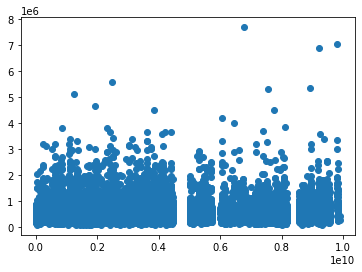

In [9]:

plt.scatter(x=Raw_Housing_Data['ID'],y=Raw_Housing_Data['Sale Price'])

#### Identify outliers Mathematically
Do not use matplotlib, as it doesn't have capability to ignore missing value for variable (we have 4 missing value)

Use seaborn lib, as it has capability to ignore the missing value and create the box plot easily

In [10]:
q1 = Raw_Housing_Data['Sale Price'].quantile(0.25)
q3 = Raw_Housing_Data['Sale Price'].quantile(0.75)

In [11]:
iqr = q3 - q1

In [12]:
iqr

323050.0

In [13]:
upper_limit = q3 +1.5* iqr
lower_limit = q1 -1.5 * iqr
upper_limit,lower_limit

(1129575.0, -162625.0)

In [14]:
lower_limit = min(Raw_Housing_Data['Sale Price'])
lower_limit

75000.0

#### Outliers before imputing

In [15]:
import seaborn as sns

<AxesSubplot:xlabel='Sale Price'>

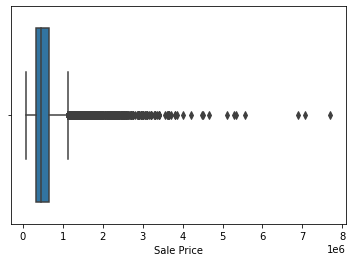

In [16]:
sns.boxplot(x=Raw_Housing_Data['Sale Price'])

#### Treat outliers using imputing


In [17]:
#function to treat the outliers 
def limit_imputer(value):
    if value> upper_limit:
        return upper_limit
    if value< lower_limit:
        return lower_limit
    else:
        return value

In [18]:
Raw_Housing_Data['Sale Price']=Raw_Housing_Data['Sale Price'].apply(limit_imputer)

In [19]:
Raw_Housing_Data['Sale Price'].describe()

count    2.160900e+04
mean     5.116186e+05
std      2.500620e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      1.129575e+06
Name: Sale Price, dtype: float64

#### Outliers after imputing

<AxesSubplot:xlabel='Sale Price'>

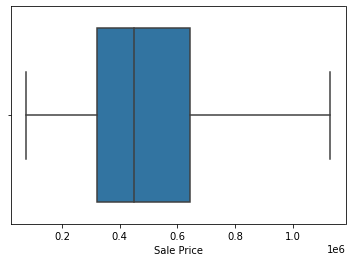

In [20]:
sns.boxplot(x=Raw_Housing_Data['Sale Price'])

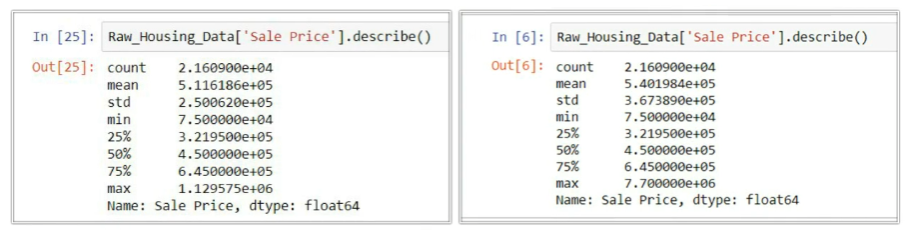

Mean > Median
Data is not normally distributed and is a bit skewed towards lower values

#### Finding missing values

In [21]:
Raw_Housing_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21613 non-null  int64  
 1   Date House was Sold                        21613 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21613 non-null  int64  
 4   No of Bathrooms                            21609 non-null  float64
 5   Flat Area (in Sqft)                        21604 non-null  float64
 6   Lot Area (in Sqft)                         21604 non-null  float64
 7   No of Floors                               21613 non-null  float64
 8   Waterfront View                            21613 non-null  object 
 9   No of Times Visited                        21613 non-null  object 
 10  Condition of the House

Sale Price has 21609 records , so 4 missing values


In [22]:
#Find number of missing value in every variable
Raw_Housing_Data.isnull().sum()

ID                                           0
Date House was Sold                          0
Sale Price                                   4
No of Bedrooms                               0
No of Bathrooms                              4
Flat Area (in Sqft)                          9
Lot Area (in Sqft)                           9
No of Floors                                 0
Waterfront View                              0
No of Times Visited                          0
Condition of the House                       0
Overall Grade                                0
Area of the House from Basement (in Sqft)    3
Basement Area (in Sqft)                      0
Age of House (in Years)                      0
Renovated Year                               0
Zipcode                                      1
Latitude                                     1
Longitude                                    1
Living Area after Renovation (in Sqft)       1
Lot Area after Renovation (in Sqft)          0
dtype: int64

#### Deleting missing value rows 

In [23]:
# dropna - to drop null rows
# inplace - changes in original dataset
# axis 0 - row wise deletion
# subset - with respect to Sale Price
Raw_Housing_Data.dropna(inplace = True , axis = 0, subset = ['Sale Price'])

In [24]:
Raw_Housing_Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21609 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21609 non-null  int64  
 1   Date House was Sold                        21609 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21609 non-null  int64  
 4   No of Bathrooms                            21605 non-null  float64
 5   Flat Area (in Sqft)                        21600 non-null  float64
 6   Lot Area (in Sqft)                         21600 non-null  float64
 7   No of Floors                               21609 non-null  float64
 8   Waterfront View                            21609 non-null  object 
 9   No of Times Visited                        21609 non-null  object 
 10  Condition of the House

#### Histogram - How the values are distributed over the range

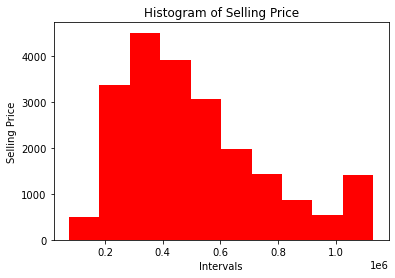

In [25]:
plt.hist(Raw_Housing_Data['Sale Price'],bins=10,color='red')
plt.xlabel("Intervals")
plt.ylabel("Selling Price")
plt.title("Histogram of Selling Price")
plt.show()

The data is skewed towards lower values.
Last bins has different value due to imputation of outliers.

Histogram visualizes the distribution of the continuous variable where bar represents the tabulated frequency at each interval/bar. It helps in determing the distribution and frequency. Looking at the distribution we can identify the outliers as well.

### Exploring Independent Numerical Variables


#### Finding missing values and imputing

In [26]:
Raw_Housing_Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21609 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21609 non-null  int64  
 1   Date House was Sold                        21609 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21609 non-null  int64  
 4   No of Bathrooms                            21605 non-null  float64
 5   Flat Area (in Sqft)                        21600 non-null  float64
 6   Lot Area (in Sqft)                         21600 non-null  float64
 7   No of Floors                               21609 non-null  float64
 8   Waterfront View                            21609 non-null  object 
 9   No of Times Visited                        21609 non-null  object 
 10  Condition of the House

We use imputer class from sklearn lib

We first gather all the numerical columns to be imputed

In [27]:
numerical_columns=["No of Bathrooms","Flat Area (in Sqft)","Lot Area (in Sqft)","Zipcode","Latitude","Longitude","Living Area after Renovation (in Sqft)"]

In [28]:
from sklearn.impute import SimpleImputer

# instantiate imputer class with parameters
# missing_values : shows how missing values represented in the data
# strategy : specifies the strategy we want to use to impute missing values
imputer = SimpleImputer(missing_values = np.nan , strategy = 'median')

Raw_Housing_Data[numerical_columns]= imputer.fit_transform(Raw_Housing_Data[numerical_columns])

In [29]:
Raw_Housing_Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21609 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21609 non-null  int64  
 1   Date House was Sold                        21609 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21609 non-null  int64  
 4   No of Bathrooms                            21609 non-null  float64
 5   Flat Area (in Sqft)                        21609 non-null  float64
 6   Lot Area (in Sqft)                         21609 non-null  float64
 7   No of Floors                               21609 non-null  float64
 8   Waterfront View                            21609 non-null  object 
 9   No of Times Visited                        21609 non-null  object 
 10  Condition of the House

#### Variable transformation

In [30]:
# convert zipcode to object 
Raw_Housing_Data['Zipcode'] = Raw_Housing_Data['Zipcode'].astype(object)

In [31]:
Raw_Housing_Data.dtypes

ID                                             int64
Date House was Sold                           object
Sale Price                                   float64
No of Bedrooms                                 int64
No of Bathrooms                              float64
Flat Area (in Sqft)                          float64
Lot Area (in Sqft)                           float64
No of Floors                                 float64
Waterfront View                               object
No of Times Visited                           object
Condition of the House                        object
Overall Grade                                  int64
Area of the House from Basement (in Sqft)    float64
Basement Area (in Sqft)                        int64
Age of House (in Years)                        int64
Renovated Year                                 int64
Zipcode                                       object
Latitude                                     float64
Longitude                                    f

In [32]:
# convert No of Times Visited to number to see the relation with sale price
Raw_Housing_Data['No of Times Visited'].unique()

array(['None', 'Thrice', 'Four', 'Twice', 'Once'], dtype=object)

In [33]:
visit_map = { 'None':'0',
              'Once':'1',
            'Twice': '2',
             'Thrice':'3',
             'Four':'4'             
}
Raw_Housing_Data['No of Times Visited'] = Raw_Housing_Data['No of Times Visited'].map(visit_map)

In [34]:
Raw_Housing_Data['No of Times Visited'].unique()

array(['0', '3', '4', '2', '1'], dtype=object)

derive new variable from existing
'Renovated Year' - ever renovated & yrs since renovation

'Ever renovated' variable : assign 'yes' wherever renovated yr has non-zero value and 'no' whenever the variable renovated is 0.

This is a categorical variable

In [35]:
Raw_Housing_Data['Ever Renovated']= np.where(Raw_Housing_Data['Renovated Year'] == 0,'No','Yes')

In [36]:
#Raw_Housing_Data.drop(columns = ["Ever Renovated"],inplace=True)

In [37]:
Raw_Housing_Data.head()

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Ever Renovated
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,0,...,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650,No
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,0,...,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639,Yes
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,0,...,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062,No
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,0,...,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000,No
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,0,...,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503,No


For Years Since Renovation = Year of Sale - Year of Renovation 

For houses that were never renovated, 'Year Since Renovation' can be assigned value of 0

'Year Since Renovation' is a numerical variable

In [38]:
Raw_Housing_Data['Purchase Year']= pd.DatetimeIndex(Raw_Housing_Data['Date House was Sold']).year

In [39]:
Raw_Housing_Data['Years Since Renovation']= np.where(Raw_Housing_Data['Ever Renovated']=='yes',abs(Raw_Housing_Data['Purchase Year']-Raw_Housing_Data['Renovated Year']),0)

In [40]:
Raw_Housing_Data.drop(columns = ['Renovated Year','Purchase Year','Date House was Sold'],inplace=True)

In [41]:
Raw_Housing_Data.head()

,ID,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,Condition of the House,...,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Ever Renovated,Years Since Renovation
0,7129300520,221900.0,3,1.00,1180.0,5650.0,1.0,No,0,Fair,...,1180.0,0,63,98178.0,47.5112,-122.257,1340.0,5650,No,0
1,6414100192,538000.0,3,2.25,2570.0,7242.0,2.0,No,0,Fair,...,2170.0,400,67,98125.0,47.7210,-122.319,1690.0,7639,Yes,0
2,5631500400,180000.0,2,1.00,770.0,10000.0,1.0,No,0,Fair,...,770.0,0,85,98028.0,47.7379,-122.233,2720.0,8062,No,0
3,2487200875,604000.0,4,3.00,1960.0,5000.0,1.0,No,0,Excellent,...,1050.0,910,53,98136.0,47.5208,-122.393,1360.0,5000,No,0
4,1954400510,510000.0,3,2.00,1680.0,8080.0,1.0,No,0,Fair,...,1680.0,0,31,98074.0,47.6168,-122.045,1800.0,7503,No,0


In [42]:
Raw_Housing_Data.to_csv('Transformed_Housing_Data',index = False)

#### Correlation

In [43]:
Transformed_Housing_Data = pd.read_csv('Transformed_Housing_Data')

In [44]:
Transformed_Housing_Data.head()

,ID,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,Condition of the House,...,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Ever Renovated,Years Since Renovation
0,7129300520,221900.0,3,1.00,1180.0,5650.0,1.0,No,0,Fair,...,1180.0,0,63,98178.0,47.5112,-122.257,1340.0,5650,No,0
1,6414100192,538000.0,3,2.25,2570.0,7242.0,2.0,No,0,Fair,...,2170.0,400,67,98125.0,47.7210,-122.319,1690.0,7639,Yes,0
2,5631500400,180000.0,2,1.00,770.0,10000.0,1.0,No,0,Fair,...,770.0,0,85,98028.0,47.7379,-122.233,2720.0,8062,No,0
3,2487200875,604000.0,4,3.00,1960.0,5000.0,1.0,No,0,Excellent,...,1050.0,910,53,98136.0,47.5208,-122.393,1360.0,5000,No,0
4,1954400510,510000.0,3,2.00,1680.0,8080.0,1.0,No,0,Fair,...,1680.0,0,31,98074.0,47.6168,-122.045,1800.0,7503,No,0


In [45]:
# in python without any lib
# correlation between sale price and flat area
Transformed_Housing_Data['Sale Price'].corr(Transformed_Housing_Data['Flat Area (in Sqft)'])

0.6951704258420672

In [46]:
# correlation using numpy lib - result in matrix

np.corrcoef(Transformed_Housing_Data['Sale Price'],Transformed_Housing_Data['Flat Area (in Sqft)'])

array([[1.        , 0.69517043],
       [0.69517043, 1.        ]])

#### How other independent numerical variables correlated with target

In [47]:
Transformed_Housing_Data.drop(columns = ['ID']).corr()

,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Years Since Renovation
Sale Price,1.000000,0.339407,0.535124,0.695170,0.101319,0.298913,0.356114,0.680914,0.606649,0.307513,-0.064306,-0.043064,0.402430,0.045401,0.629944,0.092325,NaN
No of Bedrooms,0.339407,1.000000,0.515813,0.576628,0.031692,0.175536,0.079575,0.349223,0.477558,0.303294,-0.154113,-0.152747,-0.008708,0.129569,0.391771,0.029264,NaN
No of Bathrooms,0.535124,0.515813,1.000000,0.754568,0.087732,0.500776,0.187791,0.635638,0.685193,0.283798,-0.505954,-0.203968,0.024570,0.223171,0.568568,0.087226,NaN
Flat Area (in Sqft),0.695170,0.576628,0.754568,1.000000,0.172721,0.354142,0.284678,0.705725,0.876365,0.435142,-0.318146,-0.199384,0.052538,0.240091,0.756185,0.183223,NaN
Lot Area (in Sqft),0.101319,0.031692,0.087732,0.172721,1.000000,-0.005162,0.074668,0.102314,0.183487,0.015252,-0.053119,-0.129542,-0.085719,0.229449,0.144507,0.718527,NaN
No of Floors,0.298913,0.175536,0.500776,0.354142,-0.005162,1.000000,0.029504,0.461368,0.524053,-0.245572,-0.489244,-0.059223,0.049692,0.125620,0.280106,-0.011204,NaN
No of Times Visited,0.356114,0.079575,0.187791,0.284678,0.074668,0.029504,1.000000,0.223661,0.167856,0.276974,0.053395,0.084840,0.006162,-0.078453,0.280452,0.072561,NaN
Overall Grade,0.680914,0.349223,0.635638,0.705725,0.102314,0.461368,0.223661,1.000000,0.705264,0.145232,-0.456711,-0.185855,0.111226,0.201736,0.681362,0.107581,NaN
Area of the House from Basement (in Sqft),0.606649,0.477558,0.685193,0.876365,0.183487,0.524053,0.167856,0.705264,1.000000,-0.051809,-0.423878,-0.261158,-0.000792,0.343790,0.732026,0.194101,NaN
Basement Area (in Sqft),0.307513,0.303294,0.283798,0.435142,0.015252,-0.245572,0.276974,0.145232,-0.051809,1.000000,0.133072,0.074940,0.110451,-0.144822,0.200302,0.017263,NaN


Diagonal values 1 as correlation of variable with itself is 1

Select variables which have higher correlation with target variable for model building (negative or positive)

#### Correlation between independent variables

Flat area and no. of bedrooms are highly correlated to target. But when model has to select it should pick Flat area.

### Exploring categorical variables


In [48]:
Transformed_Housing_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21609 entries, 0 to 21608
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21609 non-null  int64  
 1   Sale Price                                 21609 non-null  float64
 2   No of Bedrooms                             21609 non-null  int64  
 3   No of Bathrooms                            21609 non-null  float64
 4   Flat Area (in Sqft)                        21609 non-null  float64
 5   Lot Area (in Sqft)                         21609 non-null  float64
 6   No of Floors                               21609 non-null  float64
 7   Waterfront View                            21609 non-null  object 
 8   No of Times Visited                        21609 non-null  int64  
 9   Condition of the House                     21609 non-null  object 
 10  Overall Grade         

In [49]:
#Transformed_Housing_Data.drop(column = 'ID',inplace = True)

Categorical variables 
- waterfront view
- condition of the house
- zipcode
- ever renovated

In [50]:
Transformed_Housing_Data['Condition of the House'].head(10)

0         Fair
1         Fair
2         Fair
3    Excellent
4         Fair
5         Fair
6         Fair
7         Fair
8         Fair
9         Fair
Name: Condition of the House, dtype: object

In [51]:
# This is ordinal categorical variable
Transformed_Housing_Data['Condition of the House'].value_counts()

Fair         14028
Good          5678
Excellent     1701
Okay           172
Bad             30
Name: Condition of the House, dtype: int64

#### Relationship of categorical varaible with dependent variable(target variable) 

<AxesSubplot:xlabel='Condition of the House'>

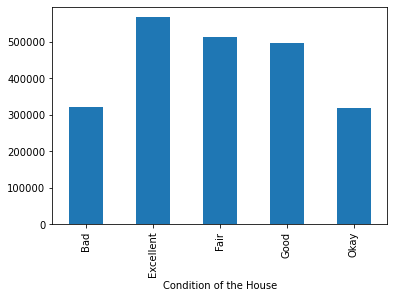

In [52]:
 # visualization
Transformed_Housing_Data.groupby('Condition of the House')['Sale Price'].mean().plot(kind='bar')

<AxesSubplot:xlabel='Condition of the House'>

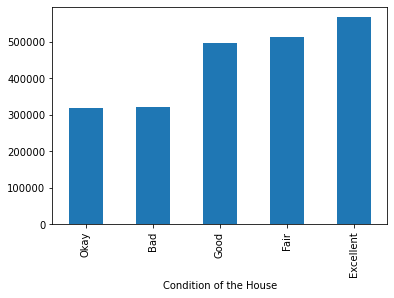

In [53]:
Transformed_Housing_Data.groupby('Condition of the House')['Sale Price'].mean().sort_values().plot(kind='bar')

<AxesSubplot:xlabel='Waterfront View'>

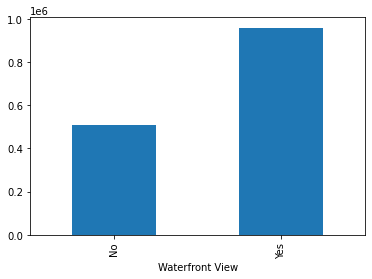

In [54]:
Transformed_Housing_Data.groupby('Waterfront View')['Sale Price'].mean().sort_values().plot(kind='bar')

<AxesSubplot:xlabel='Ever Renovated'>

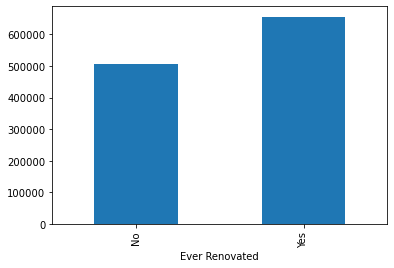

In [55]:
Transformed_Housing_Data.groupby('Ever Renovated')['Sale Price'].mean().plot(kind='bar')

<AxesSubplot:xlabel='Zipcode'>

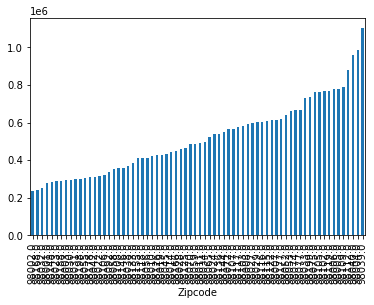

In [56]:
Transformed_Housing_Data.groupby('Zipcode')['Sale Price'].mean().sort_values().plot(kind='bar')

#### Relationship between categorical and numerical target variable - ANOVA

In [57]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

#### Rename without space : python shows error

In [58]:
Transformed_Housing_Data = Transformed_Housing_Data.rename(columns = {'Sale Price':'Sale_Price'})

In [59]:
Transformed_Housing_Data = Transformed_Housing_Data.rename(columns = {'Condition of the House':'Condition_of_the_House'})

In [60]:
Transformed_Housing_Data = Transformed_Housing_Data.rename(columns = {'Ever Renovated':'Ever_Renovated'})

In [61]:
Transformed_Housing_Data = Transformed_Housing_Data.rename(columns = {'Waterfront View':'Waterfront_View'})

In [62]:
Transformed_Housing_Data.head()

,ID,Sale_Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront_View,No of Times Visited,Condition_of_the_House,...,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Ever_Renovated,Years Since Renovation
0,7129300520,221900.0,3,1.00,1180.0,5650.0,1.0,No,0,Fair,...,1180.0,0,63,98178.0,47.5112,-122.257,1340.0,5650,No,0
1,6414100192,538000.0,3,2.25,2570.0,7242.0,2.0,No,0,Fair,...,2170.0,400,67,98125.0,47.7210,-122.319,1690.0,7639,Yes,0
2,5631500400,180000.0,2,1.00,770.0,10000.0,1.0,No,0,Fair,...,770.0,0,85,98028.0,47.7379,-122.233,2720.0,8062,No,0
3,2487200875,604000.0,4,3.00,1960.0,5000.0,1.0,No,0,Excellent,...,1050.0,910,53,98136.0,47.5208,-122.393,1360.0,5000,No,0
4,1954400510,510000.0,3,2.00,1680.0,8080.0,1.0,No,0,Fair,...,1680.0,0,31,98074.0,47.6168,-122.045,1800.0,7503,No,0


In [63]:
#ANOVA for sale price and condition of the house
mod = ols('Sale_Price ~ Condition_of_the_House',data = Transformed_Housing_Data).fit()

In [64]:
# create one way anova table
Anova_Table = sm.stats.anova_lm(mod,typ=2)

In [65]:
print(Anova_Table)

                              sum_sq       df         F        PR(>F)
Condition_of_the_House  1.441831e+13      4.0  58.25563  5.447605e-49
Residual                1.336752e+15  21604.0       NaN           NaN


In [66]:
mod = ols('Sale_Price ~ Waterfront_View',data = Transformed_Housing_Data).fit()
sm.stats.anova_lm(mod,typ=2)

,sum_sq,df,F,PR(>F)
Waterfront_View,3.283737e+13,1.0,538.192683,1.275558e-117
Residual,1.318333e+15,21607.0,NaN,NaN


In [67]:
mod = ols('Sale_Price ~ Ever_Renovated',data = Transformed_Housing_Data).fit()
sm.stats.anova_lm(mod,typ=2)

,sum_sq,df,F,PR(>F)
Ever_Renovated,1.998463e+13,1.0,324.378469,5.419055e-72
Residual,1.331185e+15,21607.0,NaN,NaN


In [68]:
mod = ols('Sale_Price ~ Zipcode',data = Transformed_Housing_Data).fit()
sm.stats.anova_lm(mod,typ=2)

,sum_sq,df,F,PR(>F)
Zipcode,2.505747e+12,1.0,40.144656,2.404899e-10
Residual,1.348664e+15,21607.0,NaN,NaN


All three cases p < 0.05 hence null hypothesis rejected.

The variables waterfront_view , ever_renovated and zipcode have impact on the target variable sale_price

#### Binning and creation of dummy variables

#### Dummy variables

In [69]:
Transformed_Housing_Data = pd.get_dummies(Transformed_Housing_Data,columns = ['Condition_of_the_House'],drop_first = True)

In [70]:
Transformed_Housing_Data.head()

,ID,Sale_Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront_View,No of Times Visited,Overall Grade,...,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Ever_Renovated,Years Since Renovation,Condition_of_the_House_Excellent,Condition_of_the_House_Fair,Condition_of_the_House_Good,Condition_of_the_House_Okay
0,7129300520,221900.0,3,1.00,1180.0,5650.0,1.0,No,0,7,...,47.5112,-122.257,1340.0,5650,No,0,0,1,0,0
1,6414100192,538000.0,3,2.25,2570.0,7242.0,2.0,No,0,7,...,47.7210,-122.319,1690.0,7639,Yes,0,0,1,0,0
2,5631500400,180000.0,2,1.00,770.0,10000.0,1.0,No,0,6,...,47.7379,-122.233,2720.0,8062,No,0,0,1,0,0
3,2487200875,604000.0,4,3.00,1960.0,5000.0,1.0,No,0,7,...,47.5208,-122.393,1360.0,5000,No,0,1,0,0,0
4,1954400510,510000.0,3,2.00,1680.0,8080.0,1.0,No,0,8,...,47.6168,-122.045,1800.0,7503,No,0,0,1,0,0


In [71]:
Transformed_Housing_Data = pd.get_dummies(Transformed_Housing_Data,columns = ['Ever_Renovated','Waterfront_View'],drop_first = True)

In [72]:
Transformed_Housing_Data.head()

,ID,Sale_Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),...,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Years Since Renovation,Condition_of_the_House_Excellent,Condition_of_the_House_Fair,Condition_of_the_House_Good,Condition_of_the_House_Okay,Ever_Renovated_Yes,Waterfront_View_Yes
0,7129300520,221900.0,3,1.00,1180.0,5650.0,1.0,0,7,1180.0,...,-122.257,1340.0,5650,0,0,1,0,0,0,0
1,6414100192,538000.0,3,2.25,2570.0,7242.0,2.0,0,7,2170.0,...,-122.319,1690.0,7639,0,0,1,0,0,1,0
2,5631500400,180000.0,2,1.00,770.0,10000.0,1.0,0,6,770.0,...,-122.233,2720.0,8062,0,0,1,0,0,0,0
3,2487200875,604000.0,4,3.00,1960.0,5000.0,1.0,0,7,1050.0,...,-122.393,1360.0,5000,0,1,0,0,0,0,0
4,1954400510,510000.0,3,2.00,1680.0,8080.0,1.0,0,8,1680.0,...,-122.045,1800.0,7503,0,0,1,0,0,0,0


#### Binning

Zipcode - 71 levels (70 dummy variables required)

Bin zipcode with similar average Sale Price into groups

In [73]:
Transformed_Housing_Data['Zipcode'].nunique()

70

In [74]:
 Zip_Table = Transformed_Housing_Data.groupby('Zipcode').agg({'Sale_Price' :'mean'}).sort_values('Sale_Price',ascending = True)

In [75]:
Zip_Table.head()

,Sale_Price
Zipcode,
98002.0,234284.035176
98168.0,240328.371747
98032.0,251296.240000
98001.0,280804.690608
98148.0,284908.596491


In [76]:
Zip_Table['Zipcode_Group'] = pd.cut(Zip_Table['Sale_Price'],bins =10,
                            labels =['Zipcode_Group_0',
                                    'Zipcode_Group_1',
                                    'Zipcode_Group_2',
                                    'Zipcode_Group_3',
                                     'Zipcode_Group_4',
                                     'Zipcode_Group_5',
                                     'Zipcode_Group_6',
                                     'Zipcode_Group_7',
                                     'Zipcode_Group_8',
                                     'Zipcode_Group_9'],
                            include_lowest = True)

In [77]:
Transformed_Housing_Data = pd.merge(Transformed_Housing_Data,Zip_Table,
                                    left_on = 'Zipcode',how='left',
                                    right_index = True)

In [78]:
Transformed_Housing_Data = Transformed_Housing_Data.drop(columns = 'Zipcode')

In [79]:
Transformed_Housing_Data.head()

,ID,Sale_Price_x,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),...,Lot Area after Renovation (in Sqft),Years Since Renovation,Condition_of_the_House_Excellent,Condition_of_the_House_Fair,Condition_of_the_House_Good,Condition_of_the_House_Okay,Ever_Renovated_Yes,Waterfront_View_Yes,Sale_Price_y,Zipcode_Group
0,7129300520,221900.0,3,1.00,1180.0,5650.0,1.0,0,7,1180.0,...,5650,0,0,1,0,0,0,0,308435.561069,Zipcode_Group_0
1,6414100192,538000.0,3,2.25,2570.0,7242.0,2.0,0,7,2170.0,...,7639,0,0,1,0,0,1,0,462330.404878,Zipcode_Group_2
2,5631500400,180000.0,2,1.00,770.0,10000.0,1.0,0,6,770.0,...,8062,0,0,1,0,0,0,0,460825.088339,Zipcode_Group_2
3,2487200875,604000.0,4,3.00,1960.0,5000.0,1.0,0,7,1050.0,...,5000,0,1,0,0,0,0,0,540466.049430,Zipcode_Group_3
4,1954400510,510000.0,3,2.00,1680.0,8080.0,1.0,0,8,1680.0,...,7503,0,0,1,0,0,0,0,666588.201814,Zipcode_Group_4


In [80]:
Transformed_Housing_Data = pd.get_dummies(Transformed_Housing_Data,
                                          columns = ['Zipcode_Group'],
                                          drop_first = True)

In [81]:
Transformed_Housing_Data.head()

,ID,Sale_Price_x,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),...,Sale_Price_y,Zipcode_Group_Zipcode_Group_1,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9
0,7129300520,221900.0,3,1.00,1180.0,5650.0,1.0,0,7,1180.0,...,308435.561069,0,0,0,0,0,0,0,0,0
1,6414100192,538000.0,3,2.25,2570.0,7242.0,2.0,0,7,2170.0,...,462330.404878,0,1,0,0,0,0,0,0,0
2,5631500400,180000.0,2,1.00,770.0,10000.0,1.0,0,6,770.0,...,460825.088339,0,1,0,0,0,0,0,0,0
3,2487200875,604000.0,4,3.00,1960.0,5000.0,1.0,0,7,1050.0,...,540466.049430,0,0,1,0,0,0,0,0,0
4,1954400510,510000.0,3,2.00,1680.0,8080.0,1.0,0,8,1680.0,...,666588.201814,0,0,0,1,0,0,0,0,0


In [82]:
Transformed_Housing_Data.to_csv('Transformed_Housing_Data_2',index = False)

### Train test split

In [83]:
Transformed_Housing_Data_2 = pd.read_csv('Transformed_Housing_Data_2')

In [84]:
Transformed_Housing_Data_2.head()

,ID,Sale_Price_x,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),...,Sale_Price_y,Zipcode_Group_Zipcode_Group_1,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9
0,7129300520,221900.0,3,1.00,1180.0,5650.0,1.0,0,7,1180.0,...,308435.561069,0,0,0,0,0,0,0,0,0
1,6414100192,538000.0,3,2.25,2570.0,7242.0,2.0,0,7,2170.0,...,462330.404878,0,1,0,0,0,0,0,0,0
2,5631500400,180000.0,2,1.00,770.0,10000.0,1.0,0,6,770.0,...,460825.088339,0,1,0,0,0,0,0,0,0
3,2487200875,604000.0,4,3.00,1960.0,5000.0,1.0,0,7,1050.0,...,540466.049430,0,0,1,0,0,0,0,0,0
4,1954400510,510000.0,3,2.00,1680.0,8080.0,1.0,0,8,1680.0,...,666588.201814,0,0,0,1,0,0,0,0,0


#### split dependent and independent variables

In [85]:
Y = Transformed_Housing_Data_2.iloc[:,0]
X = Transformed_Housing_Data_2.iloc[:,1:31]

In [86]:
X.head()

,Sale_Price_x,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),...,Ever_Renovated_Yes,Waterfront_View_Yes,Sale_Price_y,Zipcode_Group_Zipcode_Group_1,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7
0,221900.0,3,1.00,1180.0,5650.0,1.0,0,7,1180.0,0,...,0,0,308435.561069,0,0,0,0,0,0,0
1,538000.0,3,2.25,2570.0,7242.0,2.0,0,7,2170.0,400,...,1,0,462330.404878,0,1,0,0,0,0,0
2,180000.0,2,1.00,770.0,10000.0,1.0,0,6,770.0,0,...,0,0,460825.088339,0,1,0,0,0,0,0
3,604000.0,4,3.00,1960.0,5000.0,1.0,0,7,1050.0,910,...,0,0,540466.049430,0,0,1,0,0,0,0
4,510000.0,3,2.00,1680.0,8080.0,1.0,0,8,1680.0,0,...,0,0,666588.201814,0,0,0,1,0,0,0


In [87]:
Y.head()

0    7129300520
1    6414100192
2    5631500400
3    2487200875
4    1954400510
Name: ID, dtype: int64

#### Split into train and test dataset
Ideal split ratio = 70:30

In [88]:
from sklearn.model_selection import train_test_split

In [89]:
X_train, X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3)

In [90]:
X_train.shape

(15126, 30)

In [91]:
X_test.shape

(6483, 30)

In [92]:
Y_train.shape

(15126,)

In [93]:
Y_test.shape

(6483,)

In [94]:
X_train.head()

,Sale_Price_x,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),...,Ever_Renovated_Yes,Waterfront_View_Yes,Sale_Price_y,Zipcode_Group_Zipcode_Group_1,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7
17251,387500.0,4,1.00,1370.0,7140.0,2.0,0,6,1370.0,0,...,0,0,357023.604167,1,0,0,0,0,0,0
11818,670000.0,3,1.75,1730.0,3400.0,1.0,0,7,970.0,760,...,0,0,566622.214286,0,0,1,0,0,0,0
2395,280000.0,4,2.25,1990.0,7350.0,1.0,0,8,1180.0,810,...,0,0,294111.278571,0,0,0,0,0,0,0
14158,212000.0,3,2.25,1900.0,18000.0,1.0,0,7,1280.0,620,...,0,0,286486.572289,0,0,0,0,0,0,0
19357,530000.0,3,1.75,1430.0,10350.0,1.0,0,7,1430.0,0,...,0,0,594259.939929,0,0,0,1,0,0,0


### Feature Scaling - Standardisation 

This must be used for linear regression model

Linear regression model assumes input variables to be normally distributed


In [95]:
from sklearn import preprocessing
scale = preprocessing.StandardScaler()

In [96]:
#scaling dummy variables is optional but it's better to scale all.
X_train = scale.fit_transform(X_train)

In [97]:
X_train

array([[-0.49534912,  0.66848387, -1.43533129, ..., -0.21393645,
        -0.29101521, -0.11308736],
       [ 0.63168938, -0.39197623, -0.4647116 , ..., -0.21393645,
        -0.29101521, -0.11308736],
       [-0.92422217,  0.66848387,  0.18236818, ..., -0.21393645,
        -0.29101521, -0.11308736],
       ...,
       [ 0.79127005,  0.66848387,  0.50590808, ..., -0.21393645,
         3.4362465 , -0.11308736],
       [-0.65293503, -0.39197623,  0.50590808, ..., -0.21393645,
        -0.29101521, -0.11308736],
       [-0.27393093, -0.39197623, -0.4647116 , ..., -0.21393645,
        -0.29101521, -0.11308736]])

In [98]:
X_test = scale.transform(X_test)

In [99]:
X_test

array([[ 1.1343685 ,  0.66848387,  1.47652776, ..., -0.21393645,
        -0.29101521, -0.11308736],
       [-0.54521808, -0.39197623,  0.18236818, ..., -0.21393645,
        -0.29101521, -0.11308736],
       [ 0.19284253, -0.39197623, -0.14117171, ..., -0.21393645,
        -0.29101521, -0.11308736],
       ...,
       [ 0.17289495, -0.39197623,  1.15298786, ..., -0.21393645,
        -0.29101521, -0.11308736],
       [ 0.2806119 , -1.45243632, -0.4647116 , ..., -0.21393645,
        -0.29101521, -0.11308736],
       [-0.52926001, -0.39197623,  0.50590808, ..., -0.21393645,
        -0.29101521, -0.11308736]])